In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [4]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

Testing the agent population construction.

In [5]:
pop = hpa.AgentPopulation(agent_parameters, dist_params, 20)

In [6]:
isct = IndShockConsumerType(**pop.agents[0].parameters)

In [7]:
isct.solve()

In [8]:
isct.solution[0].mNrmStE

1.4295374863078805

In [9]:
isct

<HARK.ConsumptionSaving.ConsIndShockModel.IndShockConsumerType object at 0x7f4ba2e13880.
Parameters:
cycles: 1
CRRA: 4.0
Rfree: 1.0
DiscFac: 0.9465000000000001
LivPrb: [0.9949620563926881]
PermGroFac: [1.0024906793143211]
BoroCnstArt: 0.0
MaxKinks: 400
AgentCount: 4
aNrmInitMean: 0.0
aNrmInitStd: 0.0
pLvlInitMean: 1.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
aXtraMin: 0.001
aXtraMax: 100
aXtraNestFac: 1
aXtraCount: 200
aXtraExtra: [None]
PermShkStd: [0.6191893521335142]
PermShkCount: 7
TranShkStd: [0.16588349452107798]
TranShkCount: 7
UnempPrb: 0.05
UnempPrbRet: 0.005
IncUnemp: 0.3
IncUnempRet: 0.0
tax_rate: 0.0
T_retire: 0
vFuncBool: False
CubicBool: False
neutral_measure: False
RiskyAvg: 1.08
RiskyStd: 0.2
RiskyCount: 5
AdjustPrb: 1.0
ShareCount: 25
DiscreteShareBool: False>

In [10]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [11]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 20, a=0.2, q=6, r=3, market= market)

Q-0
Testing for blob existence: pnl/LMtransactions_SD97BL0SL0.csv
Output for S:97,BL:0,SL:0 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD62BL70SL31.csv
Output for S:62,BL:70,SL:31 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 112
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD112BL42SL32.csv


NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=112
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=42
SETTING: BkrSel_Limit:=32
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL42SL32.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==112.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==42.0
REPORTING: BkrSel_Limit==32.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING:

Elapsed (sys clock), run 112:  46.26077398

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL42SL32.csv
Checking for existence.
Does not exist. Uploading.
Q-1
Testing for blob existence: pnl/LMtransactions_SD20BL78SL24.csv
Output for S:20,BL:78,SL:24 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 121
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD121BL409SL7.csv


NL model loaded
SETTING: SEED:=121
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=409
SETTING: BkrSel_Limit:=7
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL409SL7.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==121.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==409.0
REPORTING: BkrSel_Limit==7.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 121:  32.56197622500001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL409SL7.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 115
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD115BL936SL17.csv


NL model loaded
SETTING: SEED:=115
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=936
SETTING: BkrSel_Limit:=17
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD115BL936SL17.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==115.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==936.0
REPORTING: BkrSel_Limit==17.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 115:  29.904780985000002

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD115BL936SL17.csv
Checking for existence.
Does not exist. Uploading.
Q-2


Sim ID (SEED): 81
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD81BL357SL13.csv


NL model loaded
SETTING: SEED:=81
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=357
SETTING: BkrSel_Limit:=13
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL357SL13.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==81.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==357.0
REPORTING: BkrSel_Limit==13.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 81:  29.913606946000016

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL357SL13.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 50
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD50BL522SL82.csv


NL model loaded
SETTING: SEED:=50
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=522
SETTING: BkrSel_Limit:=82
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD50BL522SL82.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==50.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==522.0
REPORTING: BkrSel_Limit==82.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 50:  31.192266477999993

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD50BL522SL82.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 0
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfil

Testing for blob existence: pnl/LMtransactions_SD0BL323SL324.csv


NL model loaded
SETTING: SEED:=0
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=323
SETTING: BkrSel_Limit:=324
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD0BL323SL324.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==0.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==323.0
REPORTING: BkrSel_Limit==324.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 0:  29.876425082000026

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD0BL323SL324.csv
Checking for existence.
Does not exist. Uploading.
Q-3
Testing for blob existence: pnl/LMtransactions_SD74BL307SL128.csv


Sim ID (SEED): 74
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Elapsed (sys clock), run 74:  29.863004063999995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD74BL307SL128.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 6
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfil

Testing for blob existence: pnl/LMtransactions_SD6BL365SL125.csv


NL model loaded
SETTING: SEED:=6
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=365
SETTING: BkrSel_Limit:=125
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD6BL365SL125.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==6.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==365.0
REPORTING: BkrSel_Limit==125.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 6:  30.074724894000042

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD6BL365SL125.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 60
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD60BL347SL279.csv


NL model loaded
SETTING: SEED:=60
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=347
SETTING: BkrSel_Limit:=279
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD60BL347SL279.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==60.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==347.0
REPORTING: BkrSel_Limit==279.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 60:  30.39949128500001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD60BL347SL279.csv
Checking for existence.
Does not exist. Uploading.
Q-4


Sim ID (SEED): 14
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD14BL305SL70.csv


NL model loaded
SETTING: SEED:=14
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=305
SETTING: BkrSel_Limit:=70
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD14BL305SL70.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==14.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==305.0
REPORTING: BkrSel_Limit==70.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 14:  32.29465166199998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD14BL305SL70.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 89
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD89BL167SL85.csv


NL model loaded
SETTING: SEED:=89
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=167
SETTING: BkrSel_Limit:=85
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL167SL85.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==89.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==167.0
REPORTING: BkrSel_Limit==85.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 89:  32.65858703499998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL167SL85.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 76
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD76BL432SL201.csv


NL model loaded
SETTING: SEED:=76
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=432
SETTING: BkrSel_Limit:=201
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD76BL432SL201.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==76.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==432.0
REPORTING: BkrSel_Limit==201.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 76:  31.265675596999984

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD76BL432SL201.csv
Checking for existence.
Does not exist. Uploading.
Q-5


Sim ID (SEED): 110
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD110BL1696SL109.csv


NL model loaded
SETTING: SEED:=110
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1696
SETTING: BkrSel_Limit:=109
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD110BL1696SL109.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==110.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1696.0
REPORTING: BkrSel_Limit==109.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLengt

Elapsed (sys clock), run 110:  31.557373834000032

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD110BL1696SL109.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 1
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfil

Testing for blob existence: pnl/LMtransactions_SD1BL442SL150.csv


NL model loaded
SETTING: SEED:=1
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=442
SETTING: BkrSel_Limit:=150
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD1BL442SL150.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==1.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==442.0
REPORTING: BkrSel_Limit==150.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 1:  30.92280643099997

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD1BL442SL150.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 109
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD109BL2033SL291.csv


NL model loaded
SETTING: SEED:=109
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=2033
SETTING: BkrSel_Limit:=291
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD109BL2033SL291.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==109.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==2033.0
REPORTING: BkrSel_Limit==291.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLengt

Elapsed (sys clock), run 109:  31.09404786899995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD109BL2033SL291.csv
Checking for existence.
Does not exist. Uploading.


In [12]:
data = sim.data()

In [13]:
data

,t,prices,buy,sell,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,97.951017,0,0,1224.493309,156589.793028,4108.811042,10060.569697,0.986351,-0.020490,-0.000167,0.012404
1,1,95.944017,0,0,1224.493309,154132.235152,4108.811042,0.000000,0.986351,-0.020490,-0.000932,0.012703
2,2,93.978140,0,0,1221.359698,150851.168228,4066.341241,5637.285740,0.787816,-0.020490,-0.001669,0.012908
3,3,92.052544,0,0,1218.385832,149888.423365,4114.997712,10663.988755,0.836096,-0.020490,-0.002377,0.013036
4,4,90.166403,0,0,1218.385832,147590.375740,4114.997712,0.000000,0.836096,-0.020490,-0.003059,0.013102
...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,23.547519,0,0,7946.562209,263572.153735,4840.291588,3613.515546,0.629633,0.036806,0.025776,0.018987
356,356,24.414203,0,0,7931.861893,269934.307816,4842.536551,725.072674,0.625127,0.036806,0.026591,0.018499
357,357,25.312786,0,0,7931.861893,276850.125527,4834.055317,1164.601124,0.628210,0.036806,0.027346,0.018002
358,358,26.244442,0,0,7866.385088,280899.576618,4783.434525,8943.239444,0.610715,0.036806,0.028044,0.017500


In [14]:
data['total_consumption'].rolling(3).mean()

0              NaN
1              NaN
2      5232.618479
3      5433.758165
4      5433.758165
          ...     
355    1279.318374
356    1446.196073
357    1834.396448
358    3610.971080
359    9225.244860
Name: total_consumption, Length: 360, dtype: float64

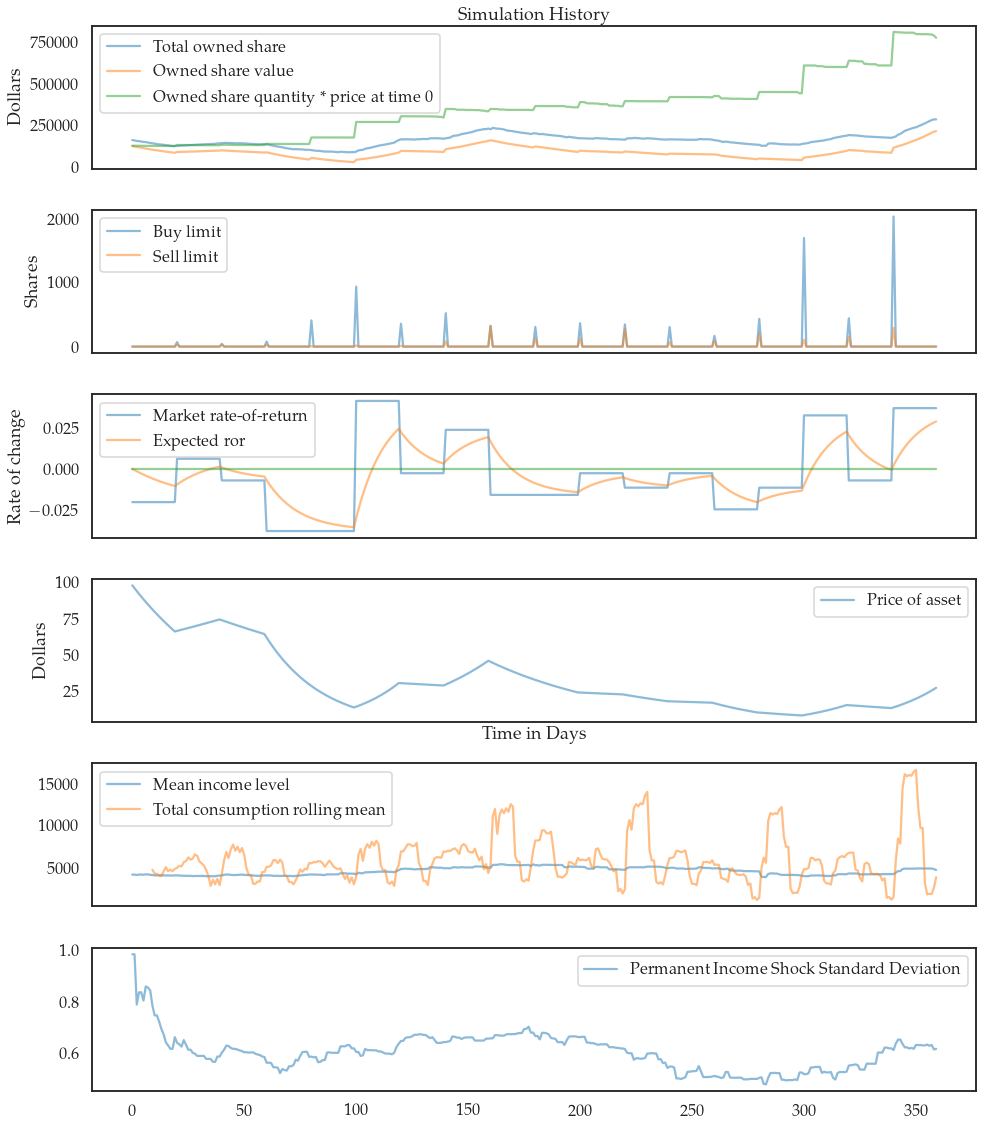

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(6,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(data['sell'], alpha=0.5, label='Sell limit')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[4].plot(data['mean_income'], alpha=0.5, label='Mean income level')
ax[4].plot(data['total_consumption'].rolling(10).mean(), alpha=0.5, label='Total consumption rolling mean')
ax[4].legend()

ax[5].plot(data['permshock_std'], alpha=0.5, label='Permanent Income Shock Standard Deviation')
ax[5].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [16]:
dir(sim.pop.agents[0].IncShkDstn[0])

['RNG',
 'X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dim',
 'draw',
 'draw_events',
 'pmf',
 'reset',
 'seed']

In [17]:
[a.IncShkDstn[0].seed for a in sim.pop.agents]

[72135241,
 76166649,
 79113926,
 65172023,
 21171409,
 69059427,
 77610728,
 97465367,
 80737356,
 38833584,
 9456386,
 6673031,
 87552539,
 85033005,
 64524456,
 5753230,
 99814170,
 30415758,
 67337204,
 13615640,
 12984790,
 23979418,
 17997617,
 23442695,
 78608191,
 34513259,
 2436756,
 41842576,
 95986368,
 13689824,
 8555728,
 36463323,
 35313933,
 21671459,
 24620170,
 41702351,
 46861693,
 6423492,
 12938219,
 64138344,
 34102391,
 19224875,
 85878282,
 94490505,
 13170615,
 30770841,
 12159361,
 62071354,
 84338031,
 80195279,
 76434887,
 809750,
 70043573,
 98845892,
 84671566,
 18159545,
 76061341,
 47344378,
 27357455,
 46244113,
 5232935,
 50312055,
 98516728,
 95569978,
 15259346,
 58381818,
 78484581,
 64283559,
 16353177,
 66181382,
 71841620,
 65889453,
 80437807,
 38328686,
 85427695,
 26426090,
 83539276,
 8431676,
 1628154,
 51197569]

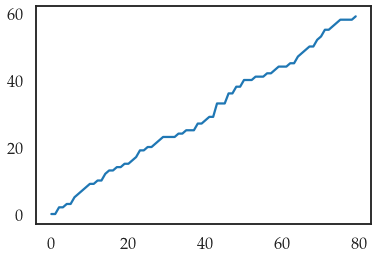

In [18]:
plt.plot(sorted([a.macro_day for a in sim.agents]))

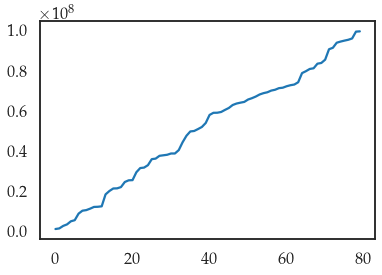

In [19]:
plt.plot(sorted([a.seed for a in sim.pop.agents]))

In [20]:
len(sim.history['total_consumption_level'])

360

In [21]:
720000 / 480

1500.0

In [22]:
sim.pop.agents

[<HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7f4ba2c5ba90.
 Parameters:
 cycles: 1
 CRRA: 4.0
 Rfree: 1.0
 DiscFac: 0.9465000000000001
 LivPrb: [0.9949620563926881]
 PermGroFac: [1.0024906793143211]
 BoroCnstArt: 0.0
 MaxKinks: 400
 AgentCount: 4
 aNrmInitMean: 0.0
 aNrmInitStd: 0.0
 pLvlInitMean: 1.0
 pLvlInitStd: 0.0
 PermGroFacAgg: 1.0
 T_age: None
 T_cycle: 1
 PerfMITShk: False
 aXtraMin: 0.001
 aXtraMax: 100
 aXtraNestFac: 1
 aXtraCount: 200
 aXtraExtra: [None]
 PermShkStd: [0.6191893521335142]
 PermShkCount: 7
 TranShkStd: [0.16588349452107798]
 TranShkCount: 7
 UnempPrb: 0.05
 UnempPrbRet: 0.005
 IncUnemp: 0.3
 IncUnempRet: 0.0
 tax_rate: 0.0
 T_retire: 0
 vFuncBool: False
 CubicBool: False
 neutral_measure: False
 RiskyAvg: 0.5529877249496169
 RiskyStd: 0.030869717490715536
 RiskyCount: 5
 AdjustPrb: 1.0
 ShareCount: 25
 DiscreteShareBool: False>,
 <HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7f4ba2dcff70.
 Parame

In [23]:
sim.pop.agents[0].AgentCount

1

In [24]:
sns.lineplot(x=[i for i in range(len(os))], y=os)

NameError: name 'sns' is not defined

In [ ]:
sns.lineplot(x=[i for i in range(len(ta))], y=os)

In [ ]:
sns.lineplot(x=os, y=ta)

In [ ]:
# what are other good plots to include? I don't have the econ background necessary to figure this out yet

In [ ]:
sim.history